## Lib

In [58]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Correlation vs Convolution

In [21]:
#Ex1
matrixA = np.array([[1, 6, 11, 16, 21],
               [2, 7, 12, 17, 22],
               [3, 8, 13, 18, 23],
               [4, 9, 14, 19, 24],
               [5, 10, 15, 20, 25]], dtype=np.float32)

avg3 = np.ones((3, 3)) / 9.0
print(cv2.filter2D(matrixA, -1, avg3, borderType=cv2.BORDER_CONSTANT))

[[ 1.7777778  4.3333335  7.666667  11.000001   8.444445 ]
 [ 3.         7.0000005 12.000001  17.000002  13.       ]
 [ 3.6666667  8.        13.        18.        13.666667 ]
 [ 4.3333335  9.        14.        19.        14.333333 ]
 [ 3.1111112  6.333333   9.666666  13.         9.777778 ]]


In [35]:
#Ex2
matrixB = np.array([[2, 2, 2, 3],
                    [2, 1, 3, 3],
                    [3, 2, 1, 2],
                    [1, 3, 2, 2]], dtype=np.uint8)
#h2
h2 = np.array([[0, 0, 0],
               [0, 0, 0],
               [0, 0, 1]], dtype=np.uint8)
h2_rotate180 = cv2.flip(h2, -1)
print("h2")
print(cv2.filter2D(matrixB, -1, h2, borderType=cv2.BORDER_CONSTANT))
print("-----------")
print(cv2.filter2D(matrixB, -1, h2_rotate180, borderType=cv2.BORDER_CONSTANT))

#h3
h3 = np.array([[-1, -1, -1],
               [-1, 8, -1],
               [-1, -1, -1]], dtype=np.uint8)
h3_rotate180 = cv2.flip(h3, -1)
print("h3")
print(cv2.filter2D(matrixB, -1, h3, borderType=cv2.BORDER_CONSTANT))
print("-----------")
print(cv2.filter2D(matrixB, -1, h3_rotate180, borderType=cv2.BORDER_CONSTANT))

#h4
h4 = np.array([[1/16, 2/16, 1/16],
               [2/16, 4/16, 2/16],
               [1/16, 2/16, 1/16]], dtype=np.float32)
h4_rotate180 = cv2.flip(h4, -1)
print("h4")
print(cv2.filter2D(matrixB, -1, h4, borderType=cv2.BORDER_CONSTANT))
print("-----------")
print(cv2.filter2D(matrixB, -1, h4_rotate180, borderType=cv2.BORDER_CONSTANT))

h2
[[1 3 3 0]
 [2 1 2 0]
 [3 2 2 0]
 [0 0 0 0]]
-----------
[[0 0 0 0]
 [0 2 2 2]
 [0 2 1 3]
 [0 3 2 1]]
h3
[[255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]]
-----------
[[255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]
 [255 255 255 255]]
h4
[[1 1 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [1 2 2 1]]
-----------
[[1 1 2 2]
 [2 2 2 2]
 [2 2 2 2]
 [1 2 2 1]]


<ipython-input-35-1ebb93e64daa>:17: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -1 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  h3 = np.array([[-1, -1, -1],


In [17]:
#Ex3
matrixC = np.array([[3, 7, 6, 2, 0],
                    [2, 4, 6, 1, 1],
                    [4, 7, 2, 5, 4],
                    [5, 7, 5, 1, 2]], dtype=np.uint8)

kernel1 = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]], dtype=np.float32)

kernel2 = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float32)

print(cv2.filter2D(matrixC, -1, kernel1, borderType=cv2.BORDER_CONSTANT))
print()
print(cv2.filter2D(matrixC, -1, kernel2, borderType=cv2.BORDER_CONSTANT))

[[ 8 16 17  9  3]
 [ 2  0  0  6 11]
 [ 9  8  1  0  2]
 [ 0  0  0  0  0]]

[[18 10  0  0  0]
 [22  9  0  0  0]
 [25  0  0  0  0]
 [21  0  0  0  0]]


Identity filter


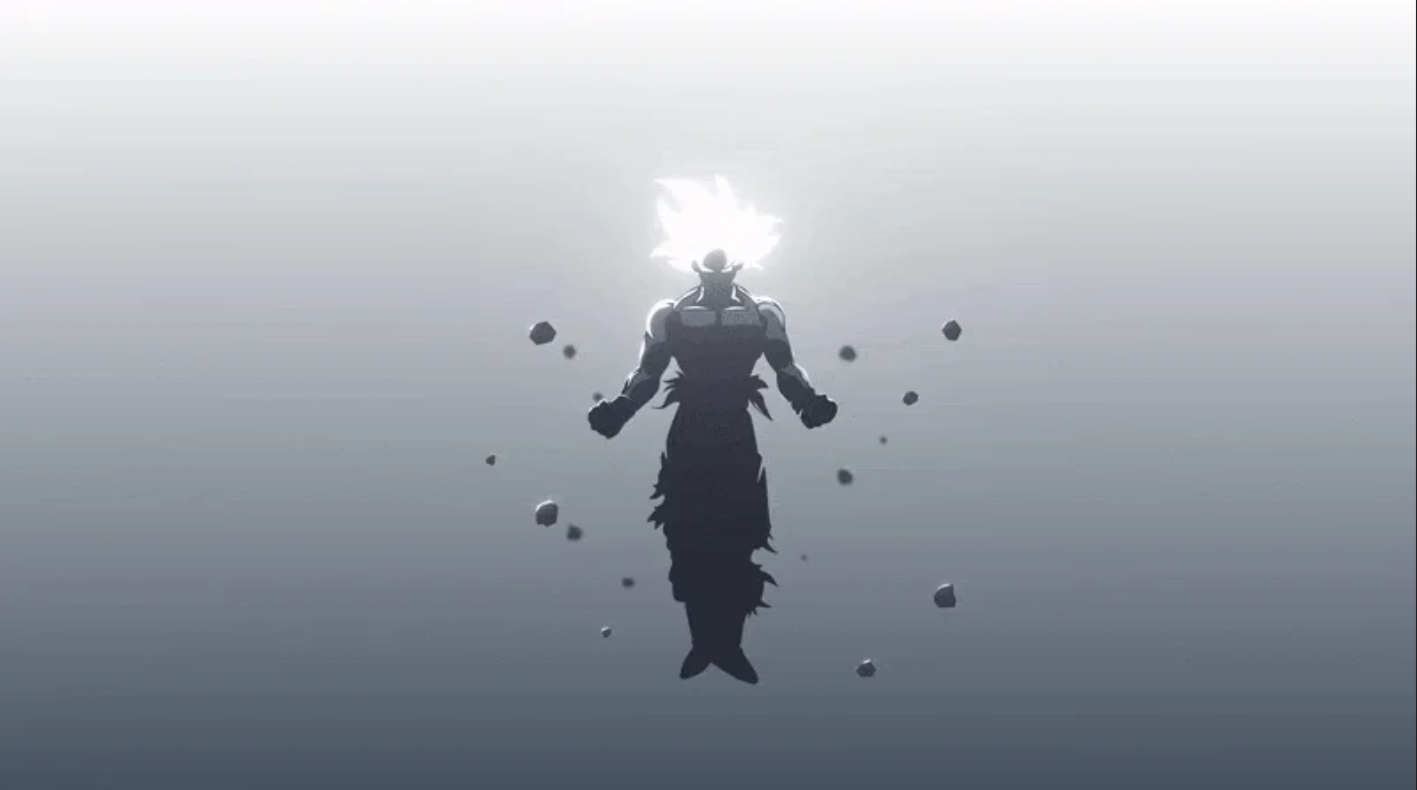

3x3 filter


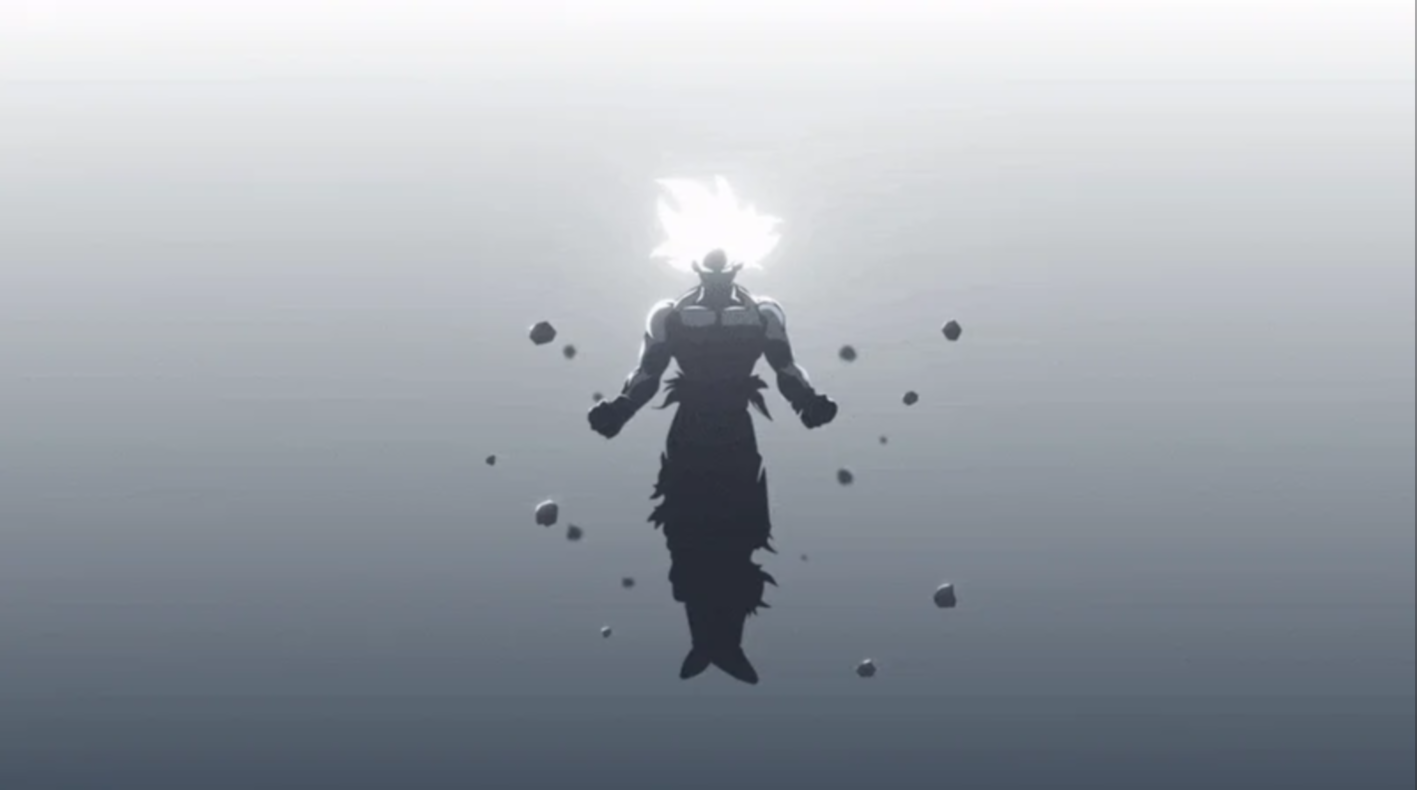

5x5 filter


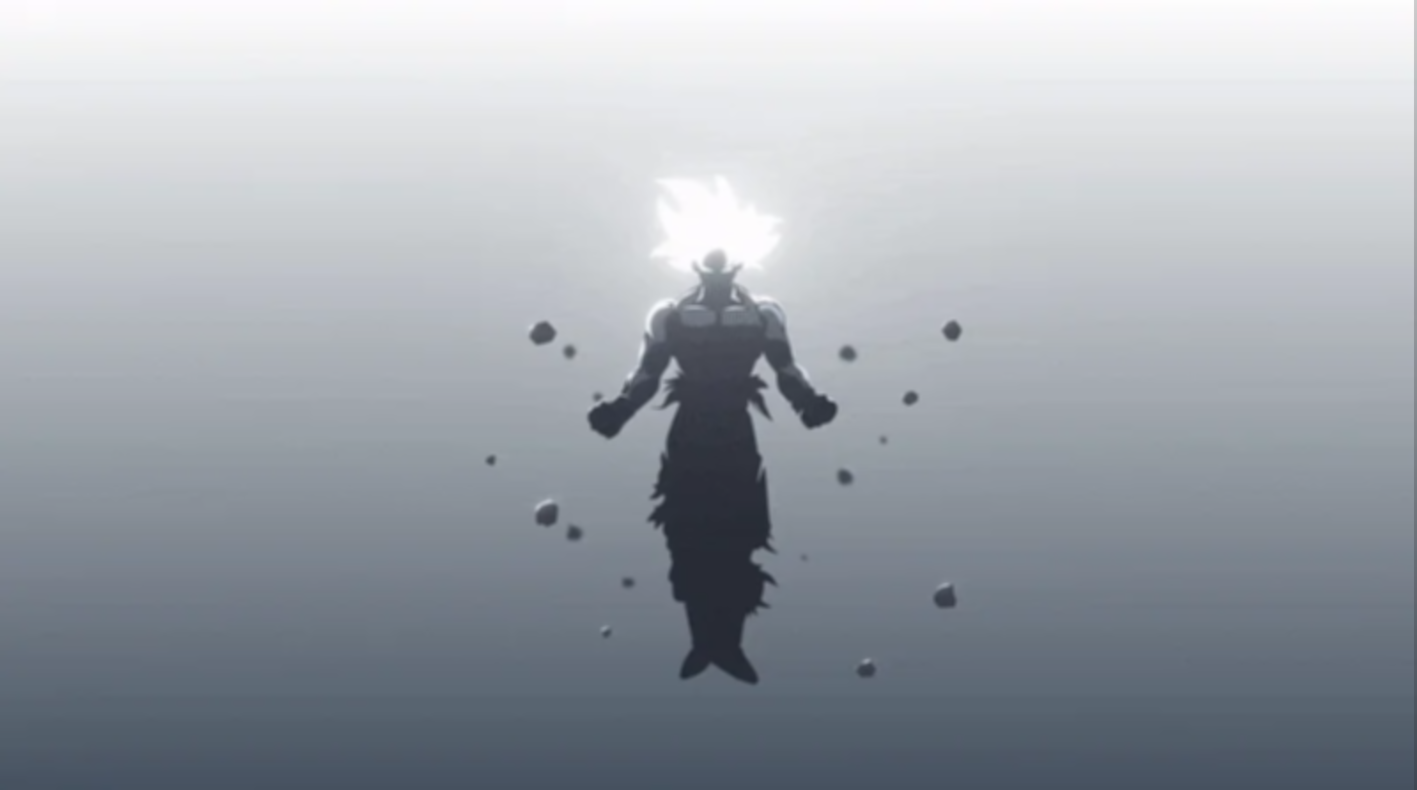

-1

In [62]:
#Ex4
img = cv2.imread('/content/drive/MyDrive/ImageProcess/LabThucHanh/Image/goku.png')
row, col = img.shape[:2]

kernel_identity = np.array([[0, 0, 0],
                           [0, 1, 0],
                           [0, 0, 0]], dtype=np.float32)
kernel_3x3 = np.ones((3, 3), dtype=np.float32) / 9.0
kernel_5x5 = np.ones((5, 5), dtype=np.float32) / 25.0

outIdentity = cv2.filter2D(img, -1, kernel_identity)
out3x3 = cv2.filter2D(img, -1, kernel_3x3)
out5x5 = cv2.filter2D(img, -1, kernel_5x5)

from google.colab.patches import cv2_imshow
print("Identity filter")
cv2_imshow(outIdentity)
print("3x3 filter")
cv2_imshow(out3x3)
print("5x5 filter")
cv2_imshow(out5x5)
cv2.waitKey(0)